In [1]:
import cv2
import queue

import matplotlib.pyplot as plt

In [6]:
def pintaPretoVermelho(a,li,ci):
    b=a.copy()
    q=queue.Queue()
    q.put(li) #1
    q.put(ci) #1
    while not q.empty(): #2
        l=q.get() #3
        c=q.get() #3
        if all(b[l,c,:]==[0,0,0]): #4
            b[l,c]=[255,0,0] #5
            q.put(l-1); q.put(c) #6-acima
            q.put(l+1); q.put(c) #6-abaixo
            q.put(l); q.put(c+1) #6-direita
            q.put(l); q.put(c-1) #6-esquerda
    return b;

In [7]:
def contaConexos(a): 
    b = a.copy()
    q = queue.Queue()
    
    q.put(0) # 1
    q.put(0) # 1
    
    count = 0
    
    for l in range(b.shape[0]):
        for c in range(b.shape[1]):
            if all(b[l,c,:] == [0,0,0]): # se nao for branco
                count = count + 1
                b = pintaPretoVermelho(b, l, c)
                plt.imshow(b)
                
    print(f"Numero de componentes conexos: {count}")
    return b

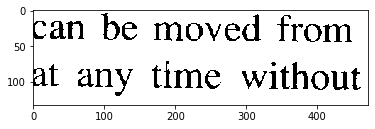

In [8]:
letras = cv2.imread('letras.bmp',cv2.IMREAD_COLOR)

plt.imshow(letras)

Numero de componentes conexos: 31


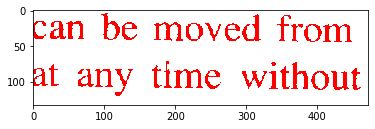

In [9]:
la = contaConexos(letras)
plt.imshow(la)